In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, TICK_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyDoubleMa import DoubleMaStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyDualThrust import DualThrustStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyKingKeltner import KkStrategy

In [2]:
engine = BacktestingEngine()

engine.setBacktestingMode(engine.TICK_MODE)
engine.setDatabase(TICK_DB_NAME, 'bitstampUSD')
engine.setStartDate('20180301')
engine.setEndDate('20180525')

engine.setSlippage(0.1)     # 设置滑点为股指1跳
engine.setRate(0.001)      # 设置手续费千1
engine.setSize(1)           # 设置合约大小 
engine.setPriceTick(0.01)   # 设置最小价格变动   
engine.setCapital(100000)   # 设置回测本金

#d = {'atrLength': 11}                     # 策略参数配置
d = {'fastWindow': 5, 'slowWindow': 10}
#engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象
engine.initStrategy(DoubleMaStrategy, d)
#engine.initStrategy(DualThrustStrategy)
#engine.initStrategy(KkStrategy)

In [3]:
engine.runBacktesting()          # 运行回测

2018-06-04 00:08:39.689000	开始载入数据
2018-06-04 00:08:49.555000	载入完成，数据量：1896167
2018-06-04 00:08:49.556000	开始回测
2018-06-04 00:08:50.868000	策略初始化完成
2018-06-04 00:08:50.868000	策略启动完成
2018-06-04 00:08:50.868000	开始回放数据
2018-06-04 00:10:14.850000	数据回放结束


2018-06-04 00:10:27.776000	计算按日统计结果
2018-06-04 00:10:27.790000	------------------------------
2018-06-04 00:10:27.790000	首个交易日：	2018-03-11
2018-06-04 00:10:27.790000	最后交易日：	2018-05-25
2018-06-04 00:10:27.790000	总交易日：	76
2018-06-04 00:10:27.790000	盈利交易日	23
2018-06-04 00:10:27.790000	亏损交易日：	51
2018-06-04 00:10:27.790000	起始资金：	100000
2018-06-04 00:10:27.790000	结束资金：	96,223.79
2018-06-04 00:10:27.790000	总收益率：	-3.78
2018-06-04 00:10:27.790000	总盈亏：	-3,776.21
2018-06-04 00:10:27.790000	最大回撤: 	-4,457.3
2018-06-04 00:10:27.790000	总手续费：	1,747.28
2018-06-04 00:10:27.790000	总滑点：	21.0
2018-06-04 00:10:27.790000	总成交金额：	1,747,284.09
2018-06-04 00:10:27.790000	总成交笔数：	210.0
2018-06-04 00:10:27.790000	日均盈亏：	-49.69
2018-06-04 00:10:27.790000	日均手续费：	22.99
2018-06-04 00:10:27.790000	日均滑点：	0.28
2018-06-04 00:10:27.790000	日均成交金额：	22,990.58
2018-06-04 00:10:27.790000	日均成交笔数：	2.76
2018-06-04 00:10:27.790000	日均收益率：	-0.06%
2018-06-04 00:10:27.790000	收益标准差：	0.19%
2018-06-04 00:10:27.790000	Sharpe Ratio：	-4.88


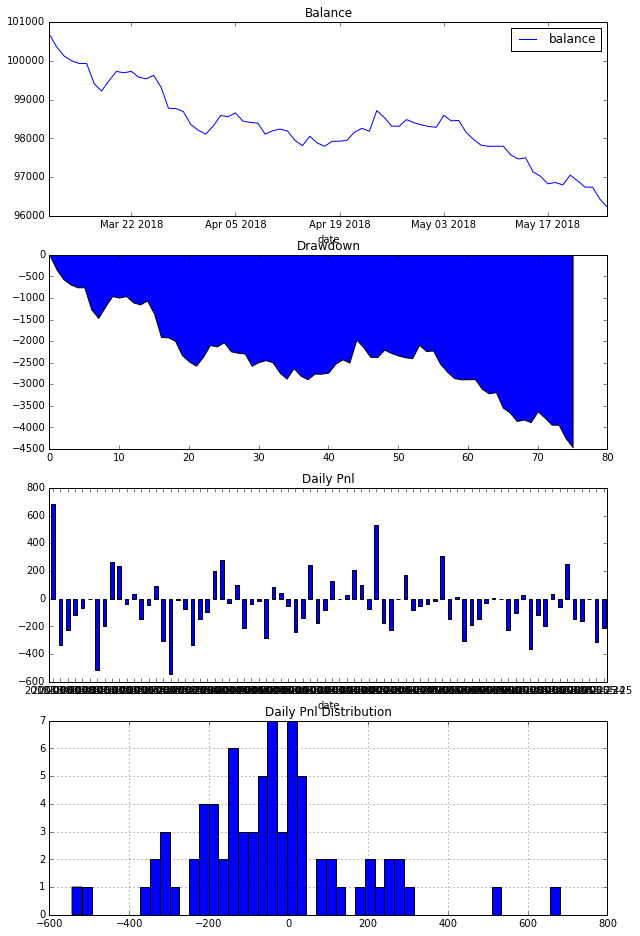

In [4]:
engine.showDailyResult()

In [ ]:
engine.showBacktestingResult()

In [ ]:
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('totalReturn')            # 设置优化排序的目标是策略净盈利
setting.addParameter('fastWindow', 60, 360, 60)    # 增加第一个优化参数fastWindow，起始5，结束20，步进5
setting.addParameter('slowWindow', 360, 720, 60)   # 增加第二个优化参数slowWindow，起始20，结束60，步进5

# 执行多进程优化
import time
start = time.time()
engine.runParallelOptimization(DoubleMaStrategy, setting)
print u'耗时：%s' %(time.time()-start)